In [1]:
"""These import statements allow the use of functions and classes provided by these libraries in the code
to achieve specific functionalities such as data processing, text processing, data visualization, etc"""
import pandas as pd
import os #Provides functions related to the operating system, such as file and directory operations.
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords # Common words typically filtered out in text processing, such as "a", "an", "the", etc.
from nltk.tokenize import word_tokenize # Tokenizing text into words or phrases as a list.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.ticker as ticker#used for setting the format and location of tick marks on charts.

# Import the necessary libraries for generating wordclouds.
import csv 
from collections import Counter#used for counting and tallying the occurrences of elements.
from wordcloud import WordCloud#used for generating word cloud visualizations.

# Part 1: "The Shawshank Redemption" is the top-ranked movie in the "IMDb Top 250 Movies" list, with over 10,000 reviews to date. So, what factors contribute to its greatness according to these reviewers? Is it the cast, the director, the writer, or the film company behind it? Let's uncover the answer through our statistical analysis!

In [2]:
# First, we define the relative path to the CSV file that contains the IMDb reviews.
relative_path = "imdb_reviews.csv" 
# We then use the os module to get the absolute path of the CSV file.
default_path = os.path.abspath(relative_path) 
# We use pandas to read the CSV file into a dataframe.
data = pd.read_csv(default_path, encoding='latin1')
print(data.head())

                                           title  warning  rate  \
0           Some birds aren't meant to be caged.     True    10   
1  An incredible movie. One that lives with you.    False    10   
2                          Don't Rent Shawshank.    False    10   
3              This is How Movies Should Be Made    False    10   
4  A classic piece of unforgettable film-making.     True    10   

                                             content   vote  year  
0  The Shawshank Redemption is written and direct...    876  2010  
1  It is no wonder that the film has such a high ...    178  2021  
2  I'm trying to save you money; this is the last...     -1  2005  
3  This movie is not your ordinary Hollywood flic...     -1  2008  
4  In its Oscar year, Shawshank Redemption (writt...  1,315  2006  


In [3]:
# We create a new column in the dataframe that concatenates the title and content columns.
data["combined"] = data["title"] + " " + data["content"]
print(data.head())
# We download the stopwords and punkt packages from the NLTK library.
nltk.download("stopwords")
nltk.download("punkt")

                                           title  warning  rate  \
0           Some birds aren't meant to be caged.     True    10   
1  An incredible movie. One that lives with you.    False    10   
2                          Don't Rent Shawshank.    False    10   
3              This is How Movies Should Be Made    False    10   
4  A classic piece of unforgettable film-making.     True    10   

                                             content   vote  year  \
0  The Shawshank Redemption is written and direct...    876  2010   
1  It is no wonder that the film has such a high ...    178  2021   
2  I'm trying to save you money; this is the last...     -1  2005   
3  This movie is not your ordinary Hollywood flic...     -1  2008   
4  In its Oscar year, Shawshank Redemption (writt...  1,315  2006   

                                            combined  
0  Some birds aren't meant to be caged. The Shaws...  
1  An incredible movie. One that lives with you. ...  
2  Don't Rent Sha

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jasmine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jasmine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def preprocess_text(text):
    # Convert the text to lowercase.
    text = text.lower()
    # Tokenize the text into individual words.
    words = word_tokenize(text)
    # Retrieve a set of stopwords from the NLTK library.
    stop_words = set(stopwords.words("english"))
    # Remove any words that are not alphabetic characters or are stopwords.
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Return the preprocessed words.
    return words

In [5]:
# Create a new column in the dataframe called "processed".
# Apply the preprocess_text function to each row in the "combined" column of the dataframe.
# The preprocess_text function tokenizes and preprocesses the text in each row.
data["processed"] = data["combined"].apply(preprocess_text)
print(data.head())

                                           title  warning  rate  \
0           Some birds aren't meant to be caged.     True    10   
1  An incredible movie. One that lives with you.    False    10   
2                          Don't Rent Shawshank.    False    10   
3              This is How Movies Should Be Made    False    10   
4  A classic piece of unforgettable film-making.     True    10   

                                             content   vote  year  \
0  The Shawshank Redemption is written and direct...    876  2010   
1  It is no wonder that the film has such a high ...    178  2021   
2  I'm trying to save you money; this is the last...     -1  2005   
3  This movie is not your ordinary Hollywood flic...     -1  2008   
4  In its Oscar year, Shawshank Redemption (writt...  1,315  2006   

                                            combined  \
0  Some birds aren't meant to be caged. The Shaws...   
1  An incredible movie. One that lives with you. ...   
2  Don't Rent 

In [6]:
# Dimensions list with grouped keywords 
dimensions = [
    {   
        # Each dictionary has a "name" key, which specifies the name of the dimension, and a "keywords" key,
        "name": "Writing Credit", 
        # which is a list of keywords associated with that dimension.
        "keywords": [["stephen king", "stephen", "king"]]
    },
    {
        "name": "Cast",
        "keywords": [
            ["tim robbins", "tim", "tim robbins", "andy", "andy dufresne"],
            ["morgan freeman", "morgan", "freeman", "ellis", "ellis boyd 'red' redding","red"],
            ["bob gunton", "bob", "gunton", "warden", "norton", "warden norton"],
            ["william sadler", "william", "sadler", "heywood"],
            ["clancy brown", "clancy", "brown", "captain", "hadley", "captain hadley"]
        ]
    },
    {
        "name": "Director",
        "keywords": [["frank darabont", "frank", "darabont"]]
    },
    {
        "name": "Film Company",
        "keywords": [["castle rock entertainment", "castle rock", "castlerock", "film company"]]
    }
]

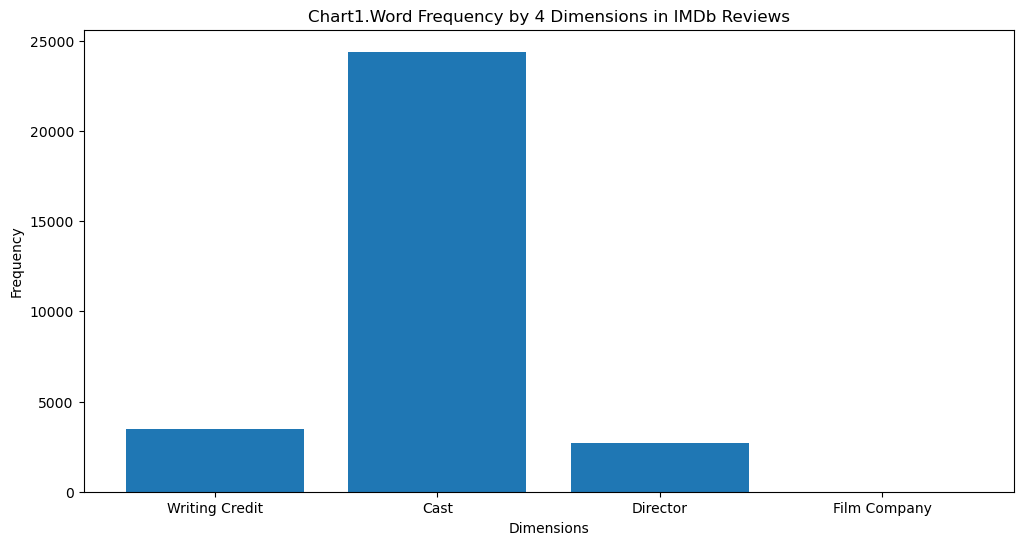

In [7]:
# Create a dictionary called "all_keywords_freq" that maps each dimension name to an initial frequency of 0.
# This dictionary is used to store the frequency of each dimension's keywords in the IMDB reviews.
all_keywords_freq = {dimension["name"]: 0 for dimension in dimensions}

# Iterate over each row in the data dataframe.
for _, row in data.iterrows():
    # For each row, iterate over each dimension and its associated keywords.
    for dimension in dimensions:
        # For each keyword, count how many times it appears in the "processed" column of the row.
        for keyword_group in dimension["keywords"]:
            # Count how many times keywords in the group appear in the "processed" column of the row.
            keyword_count = sum(row["processed"].count(keyword) for keyword in keyword_group)
            # Update the frequency of the corresponding dimension in the "all_keywords_freq" dictionary.
            all_keywords_freq[dimension["name"]] += keyword_count

# Create a bar plot that shows the frequency of each dimension's keywords in the IMDB reviews.
plt.figure(figsize=(12, 6))
plt.bar(all_keywords_freq.keys(), all_keywords_freq.values())
plt.xlabel("Dimensions")
plt.ylabel("Frequency")
plt.title("Chart1.Word Frequency by 4 Dimensions in IMDb Reviews")
plt.show()

In [8]:
# Function to capitalize the first letter of each word in a keyword
def capitalize_words(keyword):
    words = keyword.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

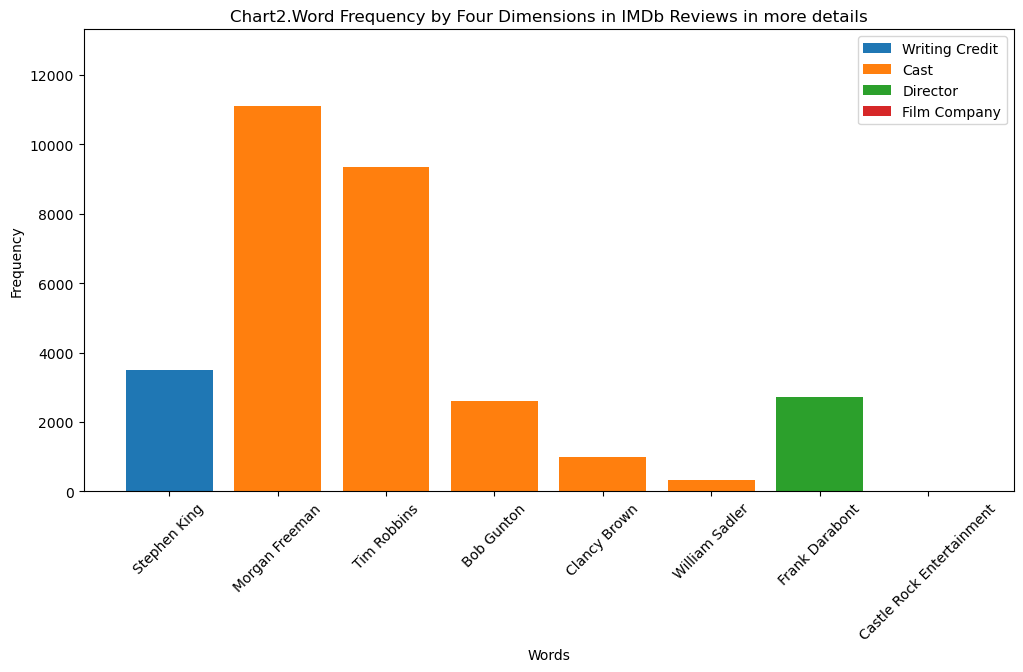

In [9]:
# Create a new figure
plt.figure(figsize=(12, 6))

all_frequencies = []

# Loop through each dimension in the dimensions list
for dimension in dimensions:
    # Initialize an empty frequency distribution for the current dimension
    dimension_freq = nltk.FreqDist()
    # Loop through each row in the data dataframe, ignoring the index value using "_"
    for _, row in data.iterrows():
        # Loop through each group of related keywords for the current dimension
        for keyword_group in dimension["keywords"]:
            # Check if any word in the keyword group is present in the processed row
            words_in_group = [word for word in row["processed"] if word in keyword_group]
            if words_in_group:
                # Update the frequency distribution with the main keyword,
                # multiplied by the length of words_in_group to get the total frequency
                dimension_freq.update([keyword_group[0]] * len(words_in_group))

    # Find the most common words in the frequency distribution for the current dimension
    most_common_words = dimension_freq.most_common(len(dimension["keywords"]))
    # Extend the all_frequencies list with the frequency values of the most common words
    all_frequencies.extend([freq for _, freq in most_common_words]) 
    # Create a bar chart with the most common words and their frequencies
    plt.bar([capitalize_words(word) for word, _ in most_common_words], [freq for _, freq in most_common_words], label=dimension["name"])

# Set labels, title, and legend for the chart
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Chart2.Word Frequency by Four Dimensions in IMDb Reviews in more details")

# Set the y-axis limit based on the total sum of frequencies
max_y = max(all_frequencies)
plt.ylim(0, max_y * 1.2)

plt.xticks(rotation=45)

plt.legend()

# Display the chart
plt.show()


In [10]:
# Create dictionaries to store word frequencies for actors and roles
actor_freq = {}
role_freq = {}

for _, row in data.iterrows():
    # Loop through the keyword groups in "Cast"
    for keyword_group in dimensions[1]["keywords"]:
        # Separate the keywords for actors and roles
        actor_keywords = keyword_group[:3]
        role_keywords = keyword_group[3:]
        # Store the full name of the actor as actor_key
        actor_key = keyword_group[0]
        # Create a list of words from the current Dataframe column that match with the actor_keywords
        actor_words = [word for word in row["processed"] if word in actor_keywords]
        # Check if there are any matching words in actor_words
        if actor_words:
            # If actor_key is not already in the actor_freq dictionary, add it with the initial count of matching words
            if actor_key not in actor_freq:
                actor_freq[actor_key] = len(actor_words)
            # If actor_key is already in the actor_freq dictionary, increment its count by the number of matching words
            else:
                actor_freq[actor_key] += len(actor_words)
        # Update the role_words
        role_words = [word for word in row["processed"] if word in role_keywords]
        if role_words:
            if actor_key not in role_freq:
                role_freq[actor_key] = len(role_words)
            else:
                role_freq[actor_key] += len(role_words)

# Create a new DataFrame
# "Actor" contains the actor names from actor_freq.keys(), duplicated for both "Actor" and "Role" categories
# "Frequency" contains the word frequencies from both actor_freq and role_freq dictionaries
# "Category" specifies whether the frequency data is for the "Actor" or "Role" category

def capitalize_word(word):
    if word in {"andy", "red", "shawshank", "freeman", "morgan", "tim", "robbins"}:
        return word.title()
    return word

actor_role_data = pd.DataFrame({
    "Actor": [capitalize_words(name) for name in actor_freq.keys()] * 2,
    "Frequency": list(actor_freq.values()) + list(role_freq.values()),
    "Category": ["Actors"] * len(actor_freq) + ["Roles"] * len(role_freq)
})

print(actor_role_data.head())
print(actor_role_data.tail())

            Actor  Frequency Category
0     Tim Robbins       2625   Actors
1  Morgan Freeman       7295   Actors
2      Bob Gunton        836   Actors
3  William Sadler        267   Actors
4    Clancy Brown        521   Actors
            Actor  Frequency Category
5     Tim Robbins       6729    Roles
6  Morgan Freeman       3796    Roles
7      Bob Gunton       1778    Roles
8  William Sadler         61    Roles
9    Clancy Brown        482    Roles


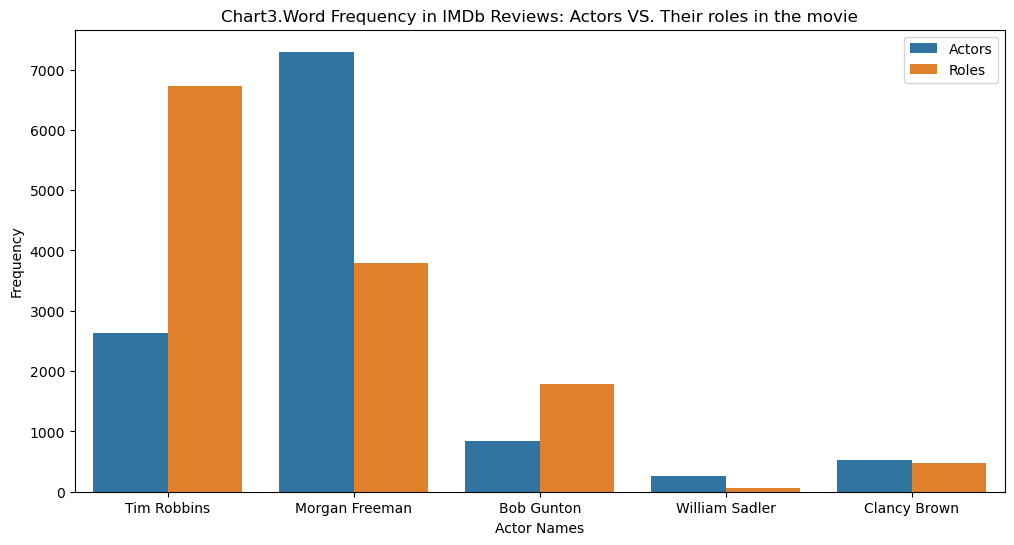

In [11]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Actor", y="Frequency", hue="Category", data=actor_role_data)

# x-axis
plt.xlabel("Actor Names")
# y-axis
plt.ylabel("Frequency")
# Title
plt.title("Chart3.Word Frequency in IMDb Reviews: Actors VS. Their roles in the movie")

plt.legend()
# Show the chart
plt.show()

# Part 2. In part one, we assumed four factors to check the word frequency. Let's ask the statistics to give us the full picture of the word frequency in the review contents and titles. What are the most frequent words, both positive and negative, that people used to describe this movie?

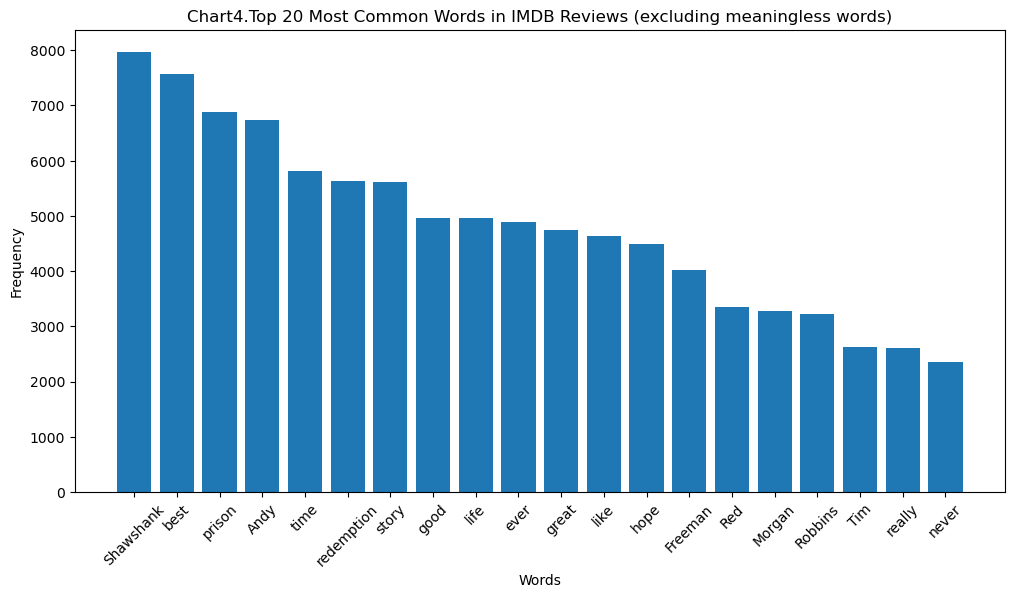

In [12]:
# Create a set of meaningless words
meaningless_words = {"movies", "film", "movie", "movie", "one", "films", "movie", "one","see","seen","watch","get","many","made"}
# Create a frequency distribution of words
word_freq = nltk.FreqDist()
# Loop through each row of data and remove meaningless words from each row of processed text
for _, row in data.iterrows():
    meaningful_words = [word for word in row["processed"] if word not in meaningless_words]
    word_freq.update(meaningful_words)

top_words = 20
# Get the most common words and their frequencies
most_common_words = word_freq.most_common(top_words)
# Create a bar chart with capitalized keywords
plt.figure(figsize=(12, 6))
plt.bar(
    [capitalize_word(word) for word, _ in most_common_words],  # Capitalize keywords on x-axis
    [freq for _, freq in most_common_words]
)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title(f"Chart4.Top {top_words} Most Common Words in IMDB Reviews (excluding meaningless words)")
plt.xticks(rotation=45)
plt.show()

World clouds of review titles

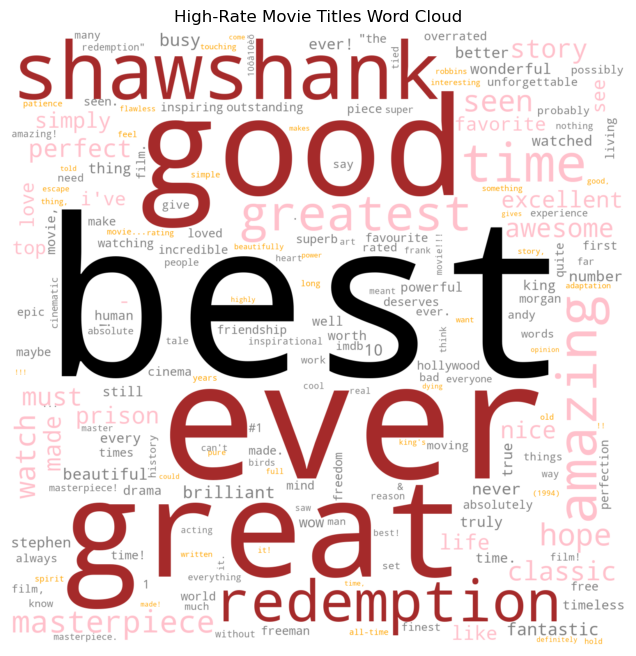

In [15]:
# Since we are creating one wordcloud for the high ratings and one wordcloud for the low ratings, here we create two seperate list to distinguish them.
high_rate_titles = []
low_rate_titles = []
# Set English Stopwords to avoid a lot of meaningless words on the wordclouds & Chart.
stop_words = set(stopwords.words("english"))
#Use the "with open()" statement to open CSV files in read-only mode, specifying the file path, line break handling and encoding format
with open(default_path, newline='', encoding='latin1') as csvfile:
#“csv.DictReader“ represents each row of data as a dictionary, where the key of the dictionary is the column name of the CSV file and the value is the data of the corresponding column of the row
    reader = csv.DictReader(csvfile)
# Iterate through each row of the dictionary and get the values of the "rate" and "title" columns.
    for row in reader:
        rate = float(row['rate'])
        title = row['title']
#     If the obtained rate is greater than 5, we will add the title to the high_rate_titles. Otherwise, it is added to the low_rate_titles.
        if rate > 6.5:
            high_rate_titles.append(title)
        else:
            low_rate_titles.append(title)
# In addition to using "stopwords" to remove meaningless words, we add some additional words that we do not want them to be generated in the wordclouds.
additional_stopwords = {"movies", "film", "movie.", "movie", "one", "films", "movie!","o n e","get","really","review"}
stop_words.update(additional_stopwords)
# Here we remove some of the words that were praised in the low rating comments so that the two wordclouds can be better compared.
additional_low_rate_stopwords = {"good", "best", "great", "time", "worth", "decent", "seen", "nice", "like","review", "story","great.","movie,","good,","wonderful","redemption", "better", "brilliant", "beautiful", "amazing", "hope", "greatest","shawshank", "ever", "classic","masterpiece","love","perfect","favorite","excellent","awesome","fantastic"}
low_rate_stopwords = stop_words.copy()
low_rate_stopwords.update(additional_low_rate_stopwords)
# Calculating the word frequency in high_rate_titles
high_rate_word_counts = Counter()
for title in high_rate_titles:
#     Splitting the titles in to words.
    words = title.split()
#     Filter out stopwords and convert words to lowercase form
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    high_rate_word_counts.update(filtered_words)
#Calculating the word frequency in low_rate_titles
low_rate_word_counts = Counter()
for title in low_rate_titles:
    words = title.split()
    filtered_words = [word.lower() for word in words if word.lower() not in low_rate_stopwords]
    low_rate_word_counts.update(filtered_words)
# Define a custom color function to assign colors to words based on their frequency
def color_func(word, font_size, position, orientation, word_counts, random_state=None, **kwargs):
    color_list = [
        "red",
        "orange",
        "gray",
        "pink",
        "brown",
        "black",
    ]
    # Combine keys and values in word_counts as tuples, sort them in descending order by the second element of the tuple
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    # Extract the first element (word) from the sorted tuples and create a new list
    sorted_words = [item[0] for item in sorted_word_counts]
    # Find the index of the word in the sorted_words list, indicating its position in the sorted word frequency list
    index = sorted_words.index(word)

    # Use the logarithm of the word frequency for color interpolation
    # Calculate the natural logarithm of the minimum word frequency
    min_log_freq = np.log(min(word_counts.values()))
    # Calculate the natural logarithm of the maximum word frequency
    max_log_freq = np.log(max(word_counts.values()))
    # Calculate the natural logarithm of the current word frequency
    log_freq = np.log(word_counts[word])

    # Use numpy's interp() function for linear interpolation, mapping the logarithm of the word frequency to the color list index
    # log_freq: the logarithm of the current word frequency
    # [min_log_freq, max_log_freq]: the range of logarithmic word frequencies
    # [0, len(color_list) - 1]: the range of the color list index
    color_index = int(np.interp(log_freq, [min_log_freq, max_log_freq], [0, len(color_list) - 1]))

    # Return the corresponding color for the current word
    return color_list[color_index]
# Generate wordclouds
high_rate_wordcloud = WordCloud(width=1500, height=1500, background_color="white", max_words=200, color_func=lambda *args, **kwargs: color_func(*args, word_counts=high_rate_word_counts, **kwargs)).generate_from_frequencies(high_rate_word_counts)

low_rate_wordcloud = WordCloud(width=1500, height=1500, background_color="white", max_words=200, color_func=lambda *args, **kwargs: color_func(*args, word_counts=low_rate_word_counts, **kwargs)).generate_from_frequencies(low_rate_word_counts)
# set the size for the wordcloud
plt.figure(figsize=(8, 8))
# make the word cloud rendered in one axis
plt.imshow(high_rate_wordcloud, interpolation="bilinear")
# turns off the display of the axis
plt.axis("off")
plt.title("High-Rate Movie Titles Word Cloud")
plt.show()

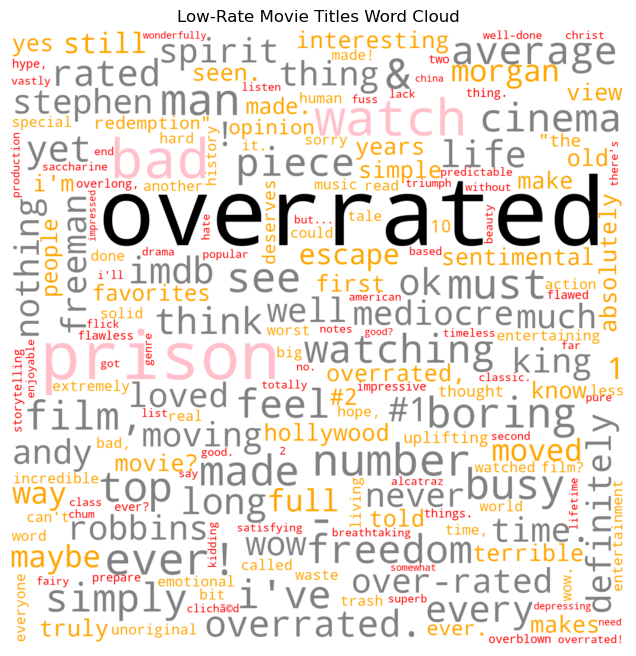

In [16]:
plt.figure(figsize=(8, 8))
plt.imshow(low_rate_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Low-Rate Movie Titles Word Cloud")
plt.show()

# Part3. So, even though The Shawshank Redemption is generally regarded as a great movie, people's views towards it do vary. Does its rating also vary over time?

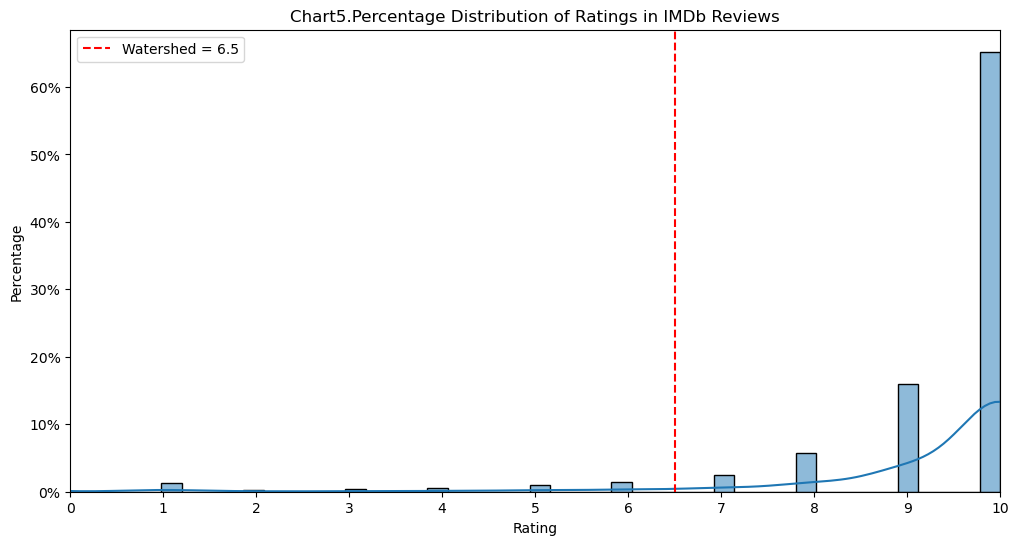

In [17]:
# Plot the percentage distribution of ratings with a vertical line at 6.5
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="rate", kde=True, bins=50, stat="probability")
plt.axvline(x=6.5, color='r', linestyle='--', label='Watershed = 6.5')
plt.xlabel("Rating")
plt.ylabel("Percentage")
plt.title("Chart5.Percentage Distribution of Ratings in IMDb Reviews")
plt.legend()

# Set the x-axis ticks to be multiples of 1, and limit the range to 0-10 
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlim(0, 10)
# Format the x-axis tick labels to display integers and decimals
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Set the y-axis ticks to display percentage
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))

plt.show()

Linear Relationship between year and rate

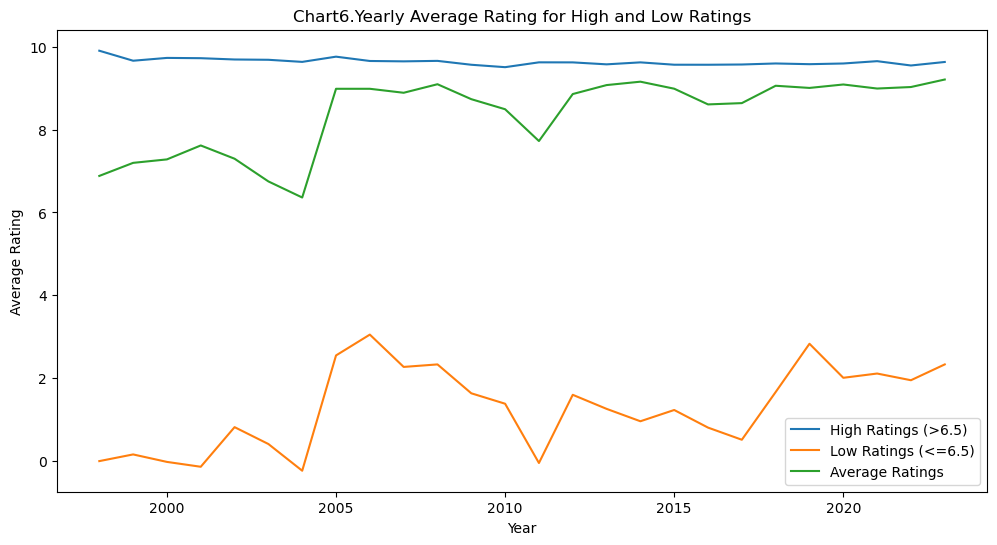

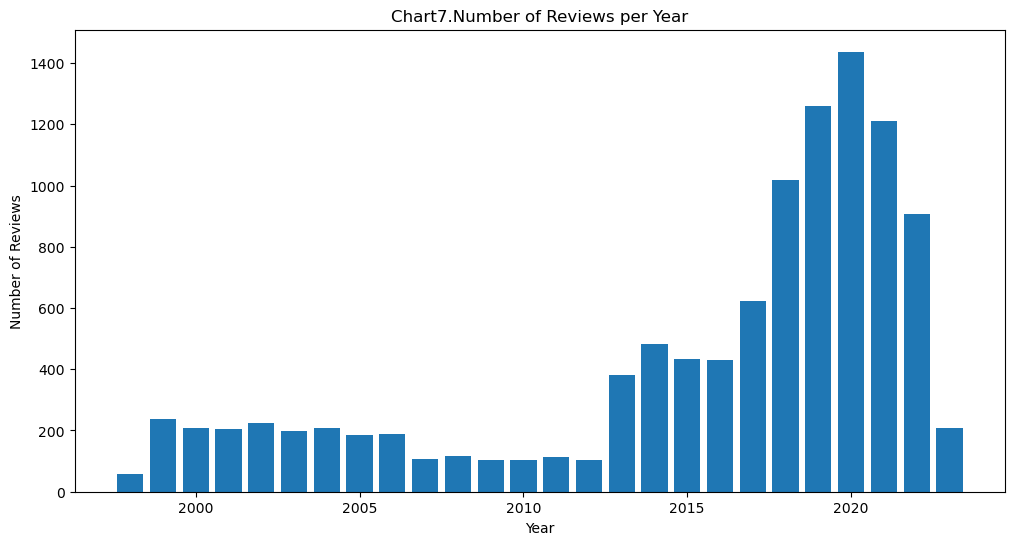

In [18]:
# Create a mask for high ratings (>6.5)
high_ratings_mask = data["rate"] > 6.5
low_ratings_mask = data["rate"] <= 6.5

# Calculate yearly average ratings for high and low ratings
yearly_high_ratings = data.loc[high_ratings_mask].groupby("year")["rate"].mean()
yearly_low_ratings = data.loc[low_ratings_mask].groupby("year")["rate"].mean()
yearly_avg_ratings = data.groupby("year")["rate"].mean()

# Calculate the number of reviews per year
yearly_review_count = data.groupby("year").size()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_high_ratings.index, yearly_high_ratings.values, label="High Ratings (>6.5)")
plt.plot(yearly_low_ratings.index, yearly_low_ratings.values, label="Low Ratings (<=6.5)")
plt.plot(yearly_avg_ratings.index, yearly_avg_ratings.values, label="Average Ratings")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Chart6.Yearly Average Rating for High and Low Ratings")
plt.legend()

# Plot the bar chart for the number of reviews per year
plt.figure(figsize=(12, 6))
plt.bar(yearly_review_count.index, yearly_review_count.values)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Chart7.Number of Reviews per Year")
plt.show()

# Part 4. Alright, we have examined enough of people's attitudes towards this movie. Now let's explore their other preferences. Do they prefer reviews without spoilers? Do they tend to write longer reviews or shorter ones?

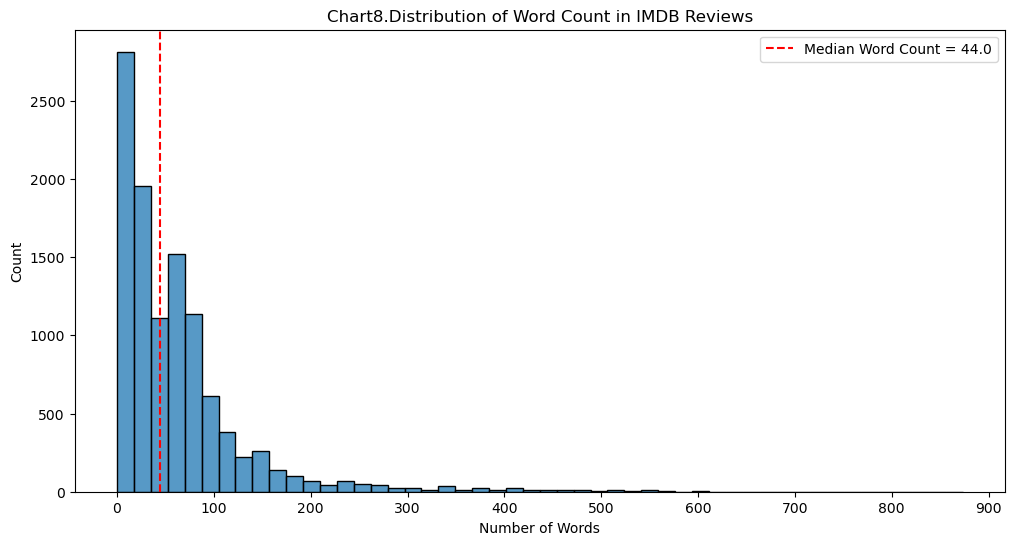

In [19]:
# Calculate the word count for each review
data["word_count"] = data["processed"].apply(lambda x: len(x))
# Calculate the median word count
median_word_count = data["word_count"].median()
# Plot the distribution of word counts and add a vertical line for the median word count
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="word_count", bins=50)
plt.axvline(x=median_word_count, color='r', linestyle='--', label=f'Median Word Count = {median_word_count}')
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Chart8.Distribution of Word Count in IMDB Reviews")
plt.legend()

# Set the x-axis ticks to be multiples of 100
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))
# Format the x-axis tick labels to display integers
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.show()

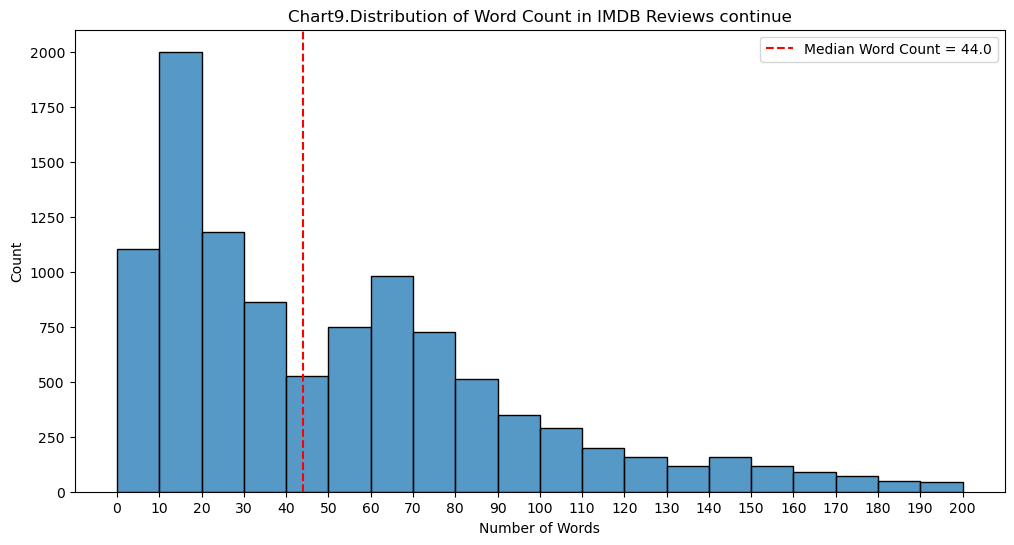

In [20]:
# Calculate the word count for each review
data["word_count"] = data["processed"].apply(lambda x: len(x))
# Calculate the median word count
median_word_count = data["word_count"].median()
# Plot the distribution of word counts and add a vertical line for the median word count
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="word_count", bins=range(0, 201, 10))
plt.axvline(x=median_word_count, color='r', linestyle='--', label=f'Median Word Count = {median_word_count}')
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Chart9.Distribution of Word Count in IMDB Reviews continue")
plt.legend()

# Set the x-axis ticks to be multiples of 10
plt.xticks(range(0, 201, 10))

plt.show()

Spoiler Part

Text(0.5, 1.0, 'Chart10.Proportion of Spoiler Warning')

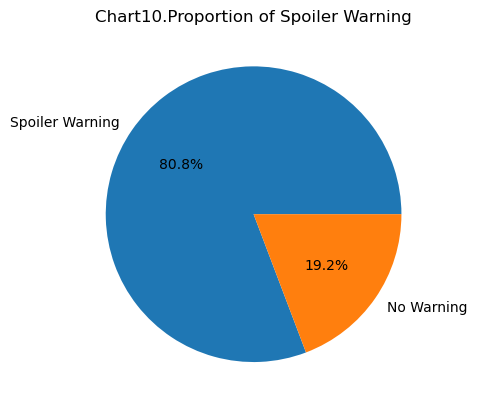

In [21]:
# Count the number of "true" and "false" in "spoiler warning" column
counts = data['warning'].value_counts()
# Calculate the percentage of "true" and "false" values
percentages = counts / counts.sum() * 100
# Make a pie chart 
plt.pie(percentages, labels=['Spoiler Warning', 'No Warning'], autopct='%1.1f%%')
plt.title('Chart10.Proportion of Spoiler Warning')

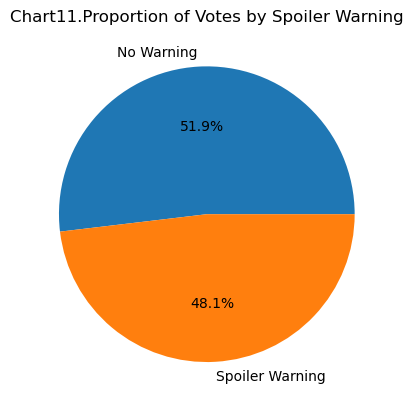

In [22]:
# Convert True & False to Yes & No
def to_convert(value):
    if value:
        return 'Spoiler Warning'
    else:
        return 'No Warning'

# Convert the "vote" column to numeric type
data['vote'] = pd.to_numeric(data['vote'], errors='coerce')

# Group the data by the "warning" column and sum the "vote" column
grouped = data.groupby('warning')['vote'].sum()

# Calculate the total number of votes
total_votes = grouped.sum()

# Calculate the percentage of votes for each "warning" value
percentages = grouped / total_votes * 100

# Convert the labels to "Spoiler Warning" and "No Warning"
convert_labels = [to_convert(value) for value in percentages.index]

# Create a pie chart to visualize the percentages
plt.pie(percentages, labels=convert_labels, autopct='%1.1f%%')
plt.title('Chart11.Proportion of Votes by Spoiler Warning')

plt.show()